# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [322]:
# Install the required libraries
!pip install prophet

In [323]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

import os
print(os.getcwd())

/Users/hbh/LocalDocs/Training/ASU/Activity Files


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [324]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/j3/gtvf75z503q_s625p1nmw4x80000gn/T/ipykernel_90425/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [325]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


,Search Trends
Date,
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76
2020-05-31 22:00:00,90
2020-05-31 23:00:00,96


<Axes: title={'center': 'Google Hourly Search Trends for May 2020'}, xlabel='Date'>

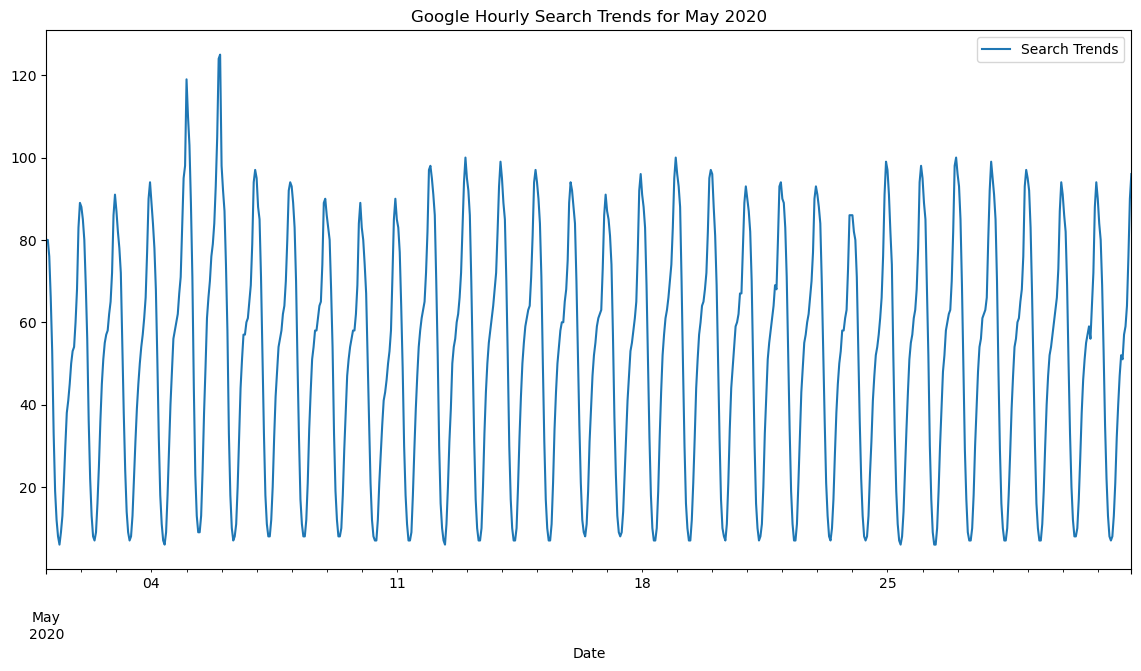

In [326]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends_may = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Review the first and last five rows of the DataFrame
display(df_mercado_trends_may.head())
display(df_mercado_trends_may.tail())

# Plot to visualize the data for May 2020
df_mercado_trends_may.plot(figsize=(14, 7), title='Google Hourly Search Trends for May 2020')


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [327]:
# Calculate the sum of the total search traffic (column name = Search Trends) for May 2020
traffic_may_2020 = df_mercado_trends_may['Search Trends'].sum()

# # Calculate the sum of total search traffic for each month in the dataset
# monthly_traffic = df_mercado_trends.resample('M').sum()

# # Calculate the monthly median for monthly_traffic
# monthly_traffic_median = monthly_traffic.median()
# print(f'monthly traffic Total median is: {monthly_traffic_median}')


# # Calculate the monthly median across all months
# monthly_median = df_mercado_trends.resample('M').median()



# # Calculate the median for May 2020. Use resample to calculate the median for each month
# monthly_median_may = monthly_median.loc['2020-05-31']

# # Print the total search traffic for May 2020 and compare it to the monthly median
# print(f'The total search traffic for May 2020 was {traffic_may_2020}.')
# print(f'The total search traffic for all months is {monthly_traffic["Search Trends"].sum()}.')
# # print the total search traffic for each month in the dataset for all months in 2020 # .sort_values(by="Search Trends", ascending=False)
# print(f'The total search traffic for each month in the dataset is as follows:\n{monthly_traffic}') # .sort_values(by="Search Trends", ascending=False)
# # print the highest monthly search traffic and the month it occurred
# print(f'The highest monthly search traffic is {monthly_traffic["Search Trends"].max()}.')
# print(f'The monthly median search traffic for May 2020 is {monthly_median_may.values[0]}.')
# print(f'The monthly median search traffic across all months is {monthly_median_may.values[0]}.')




# View the traffic_may_2020 value
print(f'Search Trends for May 2020 total: {traffic_may_2020}')


Search Trends for May 2020 total: 38181


In [328]:
# Calcluate the monthly median search traffic across all months
median_monthly_traffic = monthly_traffic.median()
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
print(f'Monthly Median Traffic: {monthly_traffic}')


Monthly Median Traffic: Search Trends    35172.5
dtype: float64


In [329]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

1.0855355746677091

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
It did appear to increase, but it doesn't appear super significant

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

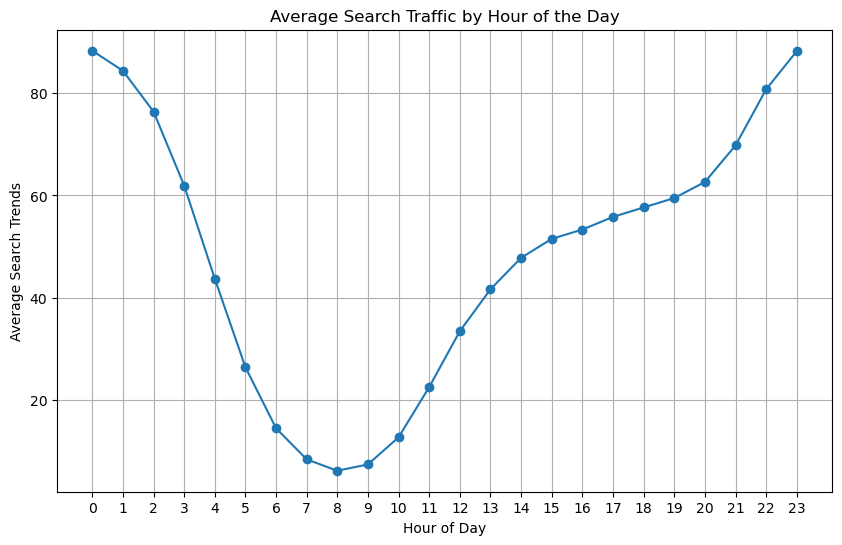

In [330]:
# # Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`


# Ensure the index is in datetime format
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

# Group by hour of the day and calculate the average 'Search Trends' for each hour
avg_traffic_by_hour = df_mercado_trends.groupby(df_mercado_trends.index.hour)['Search Trends'].mean()

# Plotting the data
import matplotlib.pyplot as plt

# Plot average traffic by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_traffic_by_hour.index, avg_traffic_by_hour, marker='o')
plt.title("Average Search Traffic by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Search Trends")
plt.xticks(range(24))  # Show each hour from 0 to 23 on the x-axis
plt.grid(True)
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

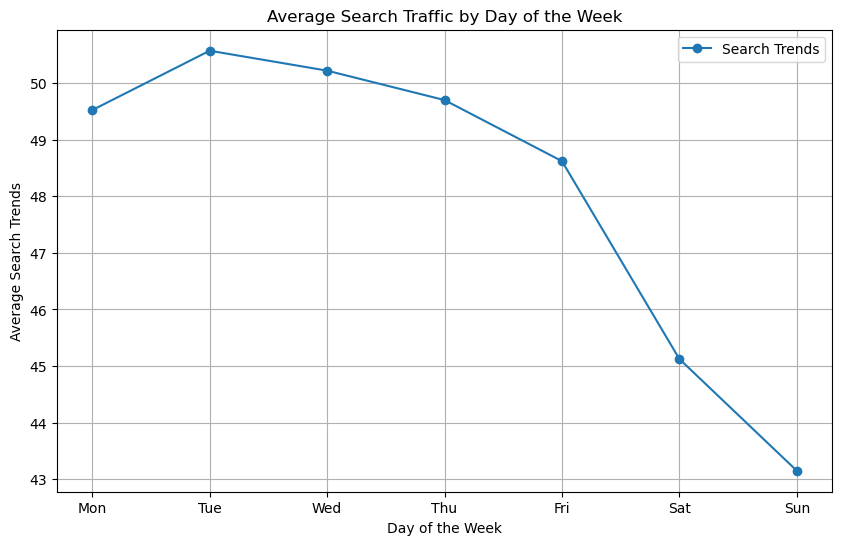

In [331]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

# Ensure the index is in datetime format. I know this is redundant but I am doing it for good practice.
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

# Group by day of the week (1=Monday, 7=Sunday) and calculate the mean of 'Search Trends'
avg_traffic_by_weekday = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day)['Search Trends'].mean()

# Plotting the data as a line plot
import matplotlib.pyplot as plt

# Plot average traffic by day of the week
plt.figure(figsize=(10, 6))
plt.plot(avg_traffic_by_weekday.index, avg_traffic_by_weekday, marker='o', label='Search Trends')
plt.title("Average Search Traffic by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Search Trends")
plt.xticks(ticks=range(1, 8), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

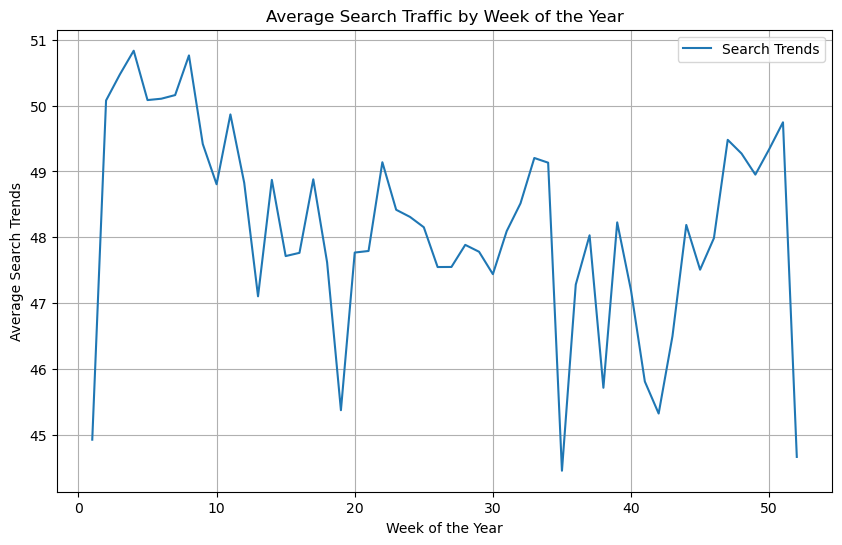

In [332]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

# Ensure the index is in datetime format. I know this is redundant but I am doing it for good practice.
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

# Group by week of the year and calculate the mean of 'Search Trends' for each week
avg_traffic_by_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week)['Search Trends'].mean()

# Plotting the data
import matplotlib.pyplot as plt

# Plot average traffic by week of the year
plt.figure(figsize=(10, 6))
plt.plot(avg_traffic_by_week.index, avg_traffic_by_week, label='Search Trends')
plt.title("Average Search Traffic by Week of the Year")
plt.xlabel("Week of the Year")
plt.ylabel("Average Search Trends")
plt.legend()
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
Search Traffic starts climbing in mid afternoon to midnight and is lowest between 5am and 11am. 
Search traffic is generally lowest on the weekends. Search traffic throughout the year seems random.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [333]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: title={'center': 'MercadoLibre Stock Price'}, xlabel='date'>

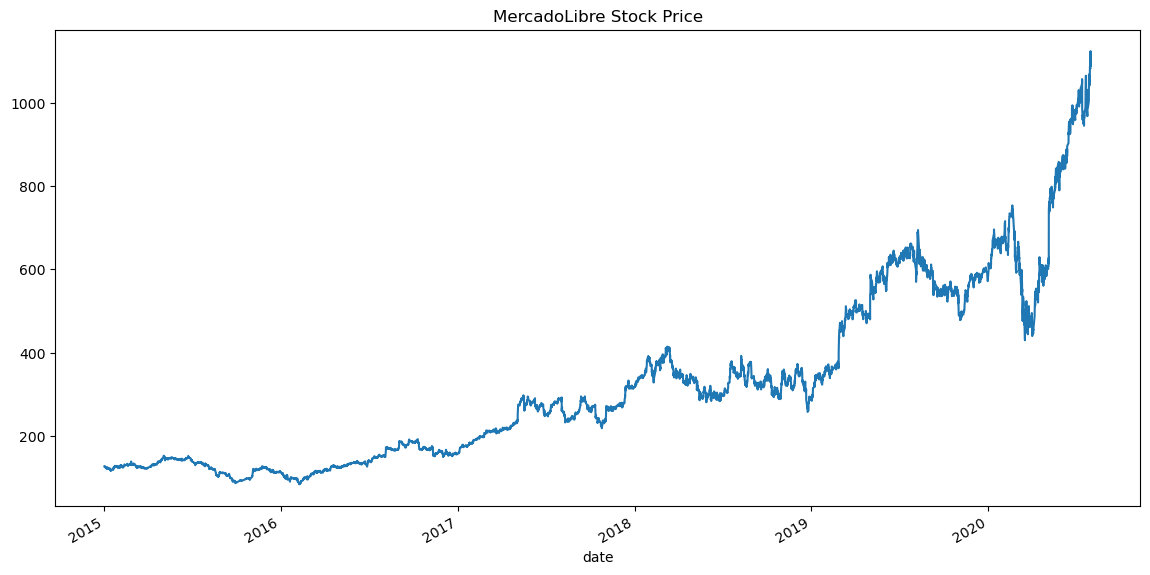

In [334]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(figsize=(14, 7), title='MercadoLibre Stock Price')


In [335]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()


# View the first and last five rows of the DataFrame
display(df_mercado_combined.head())
display(df_mercado_combined.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [336]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_mercado_combined.loc['2020-01':'2020-06']


# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

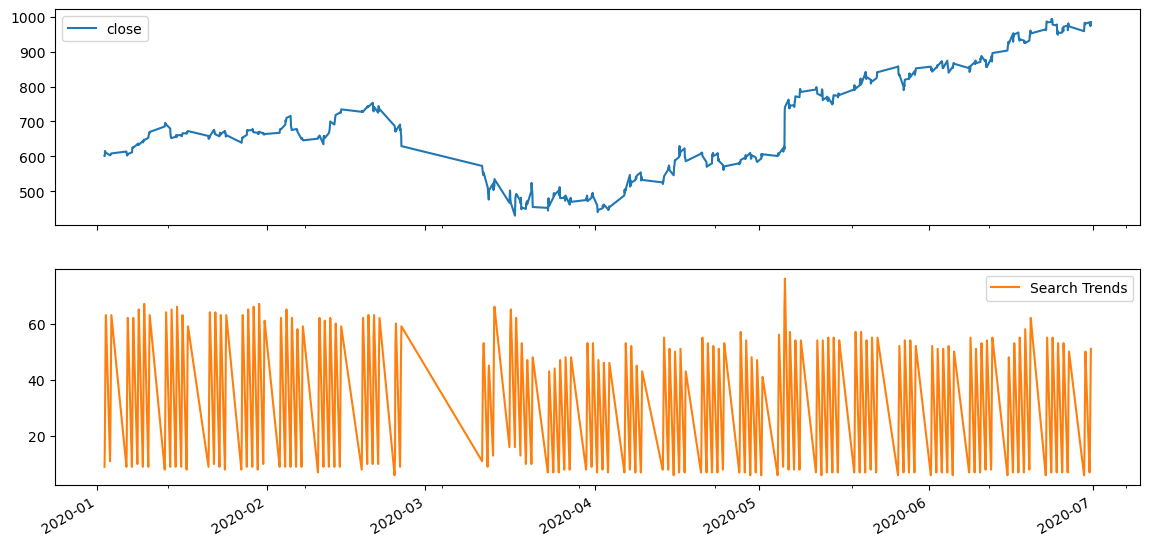

In [337]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
# don't plot hour of day, day of week, day hour
first_half_2020.plot(subplots=True, figsize=(14, 7))




##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
The close time series shows a recovery in May and an increase overall. The search trends doesn't appear to be consistently higher, aside from a spike in May.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [338]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado_combined['Lagged Search Trends'] = df_mercado_combined['Search Trends'].shift(1)



In [339]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_combined['Stock Volatility'] = df_mercado_combined['close'].pct_change().rolling(4).std()



<Axes: title={'center': 'MercadoLibre Stock Volatility'}>

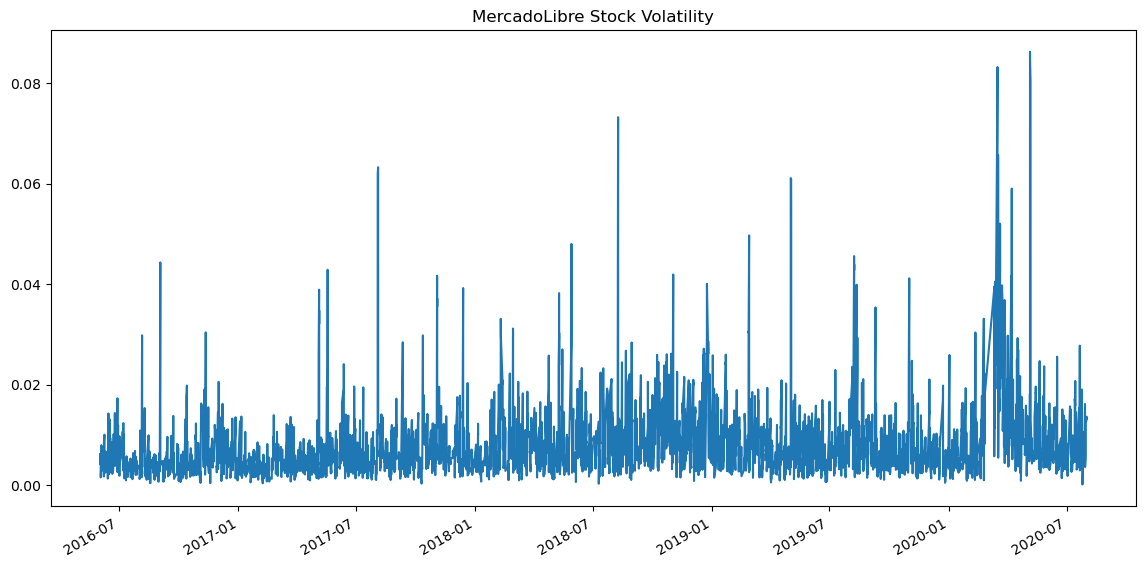

In [340]:
# Visualize the stock volatility
df_mercado_combined['Stock Volatility'].plot(figsize=(14, 7), title='MercadoLibre Stock Volatility')



**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [341]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_combined['Hourly Stock Return'] = df_mercado_combined['close'].pct_change()



In [342]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_combined.head())
display(df_mercado_combined.tail())


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [343]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
The correlations in the table suggest that no strong or predictable relationship exists between Lagged Search Trends and either Stock Volatility or Hourly Stock Return. While there is a slight negative correlation between Lagged Search Trends and Stock Volatility, it is not strong enough to imply a reliable predictive relationship.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [348]:
# Make a copy of df_mercado_combined
prophet_df = df_mercado_trends.copy()

# Reset the index to make the date information a column
prophet_df.reset_index(inplace=True)


# Rename 'Index' to 'ds' and 'Search Trends' to 'y' for Prophet
prophet_df = df_mercado_trends.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Keep only the 'ds' and 'y' columns for Prophet
prophet_df = prophet_df[['ds', 'y']]

# Drop any rows with NaN values to ensure clean data
prophet_df.dropna(inplace=True)

# Display the first and last few rows to confirm setup
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [313]:
# Call the Prophet function, store as an object
model = Prophet()


In [314]:
# Fit the time-series model.
model.fit(prophet_df)


In [349]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
df_future = model.make_future_dataframe(periods=2000, freq='H')


# View the last five rows of the future_mercado_trends DataFrame
display(df_future.tail())


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
32482,2021-05-06 09:00:00
32483,2021-05-06 10:00:00
32484,2021-05-06 11:00:00
32485,2021-05-06 12:00:00
32486,2021-05-06 13:00:00


In [350]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(df_future)


# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5712.879465,2893.169729,5634.185679,5712.879465,5712.879465,-1465.542091,-1465.542091,-1465.542091,-6.055630,...,10.169632,10.169632,10.169632,-1469.656093,-1469.656093,-1469.656093,0.0,0.0,0.0,4247.337374
1,2017-08-17 06:00:00,5719.867291,3025.983380,5517.650112,5719.867291,5719.867291,-1469.301430,-1469.301430,-1469.301430,-4.027341,...,10.935098,10.935098,10.935098,-1476.209187,-1476.209187,-1476.209187,0.0,0.0,0.0,4250.565860
2,2017-08-17 07:00:00,5726.855116,2879.772133,5614.472948,5726.855116,5726.855116,-1473.658911,-1473.658911,-1473.658911,-2.431449,...,11.543784,11.543784,11.543784,-1482.771246,-1482.771246,-1482.771246,0.0,0.0,0.0,4253.196205
3,2017-08-17 08:00:00,5733.842942,3016.240542,5628.430995,5733.842942,5733.842942,-1480.703806,-1480.703806,-1480.703806,-3.348162,...,11.986580,11.986580,11.986580,-1489.342224,-1489.342224,-1489.342224,0.0,0.0,0.0,4253.139136
4,2017-08-17 09:00:00,5740.830768,2957.700870,5534.081627,5740.830768,5740.830768,-1489.946602,-1489.946602,-1489.946602,-6.281232,...,12.256708,12.256708,12.256708,-1495.922078,-1495.922078,-1495.922078,0.0,0.0,0.0,4250.884166


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

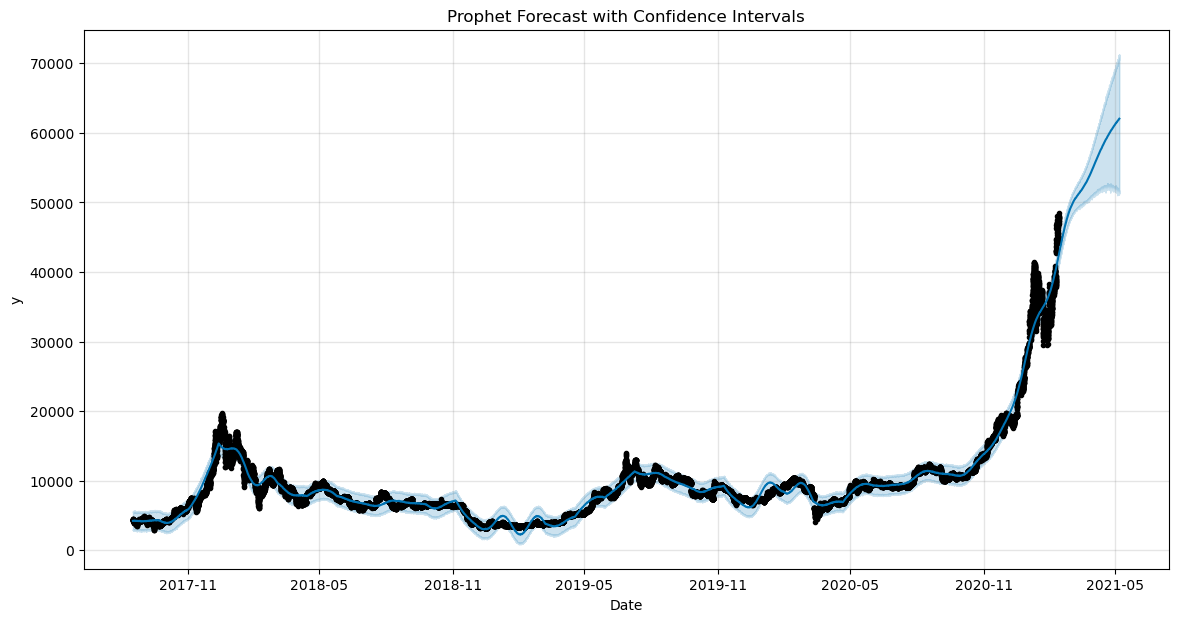

In [355]:
# Plot the Prophet predictions for the Mercado trends data

# Ensure the 'ds' column exists in the forecast DataFrame
forecast_mercado_trends.rename(columns={'Date': 'ds'}, inplace=True)

# Plot forecast with confidence intervals
fig, ax = plt.subplots(figsize=(14, 7))
model.plot(forecast_mercado_trends, ax=ax)

# Customize the plot appearance
ax.set_xlabel("Date")
ax.set_ylabel("y")
ax.set_title("Prophet Forecast with Confidence Intervals")

plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
It's very optimistic


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [356]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]



,yhat,yhat_lower,yhat_upper
ds,,,
2017-08-17 05:00:00,4247.337374,2893.169729,5634.185679
2017-08-17 06:00:00,4250.565860,3025.983380,5517.650112
2017-08-17 07:00:00,4253.196205,2879.772133,5614.472948
2017-08-17 08:00:00,4253.139136,3016.240542,5628.430995
2017-08-17 09:00:00,4250.884166,2957.700870,5534.081627
...,...,...,...
2021-05-06 09:00:00,62009.477390,51522.585177,70691.084407
2021-05-06 10:00:00,62012.394613,51458.732979,70826.831840
2021-05-06 11:00:00,62017.604859,51627.815778,70800.144576


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

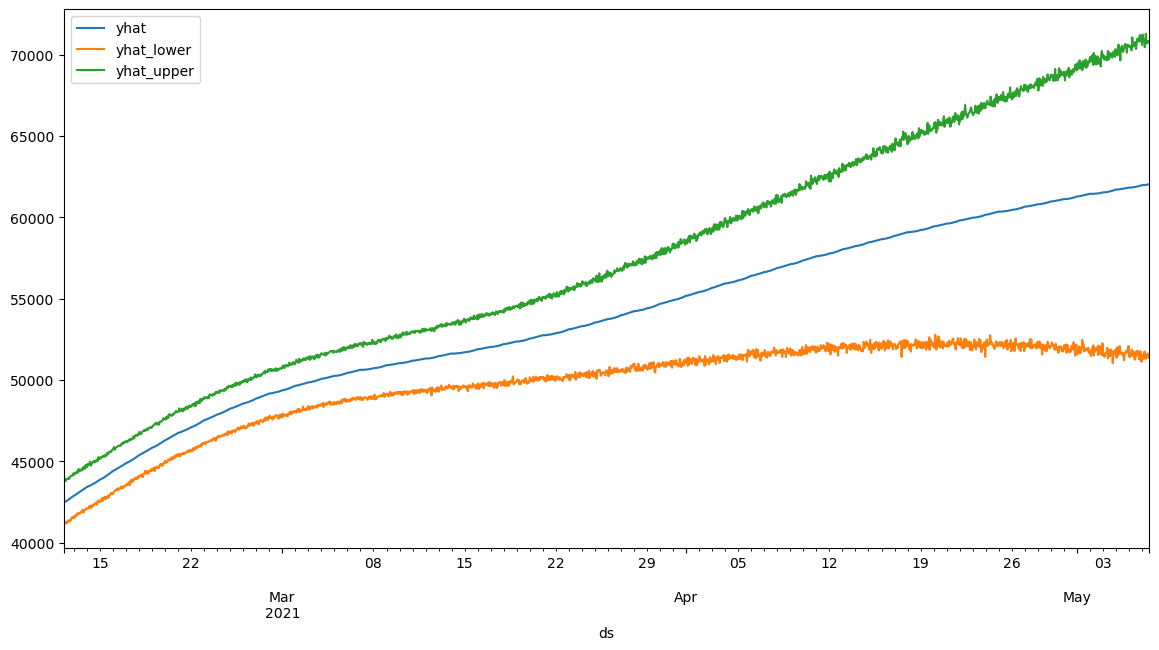

In [357]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot(figsize=(14, 7))




/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

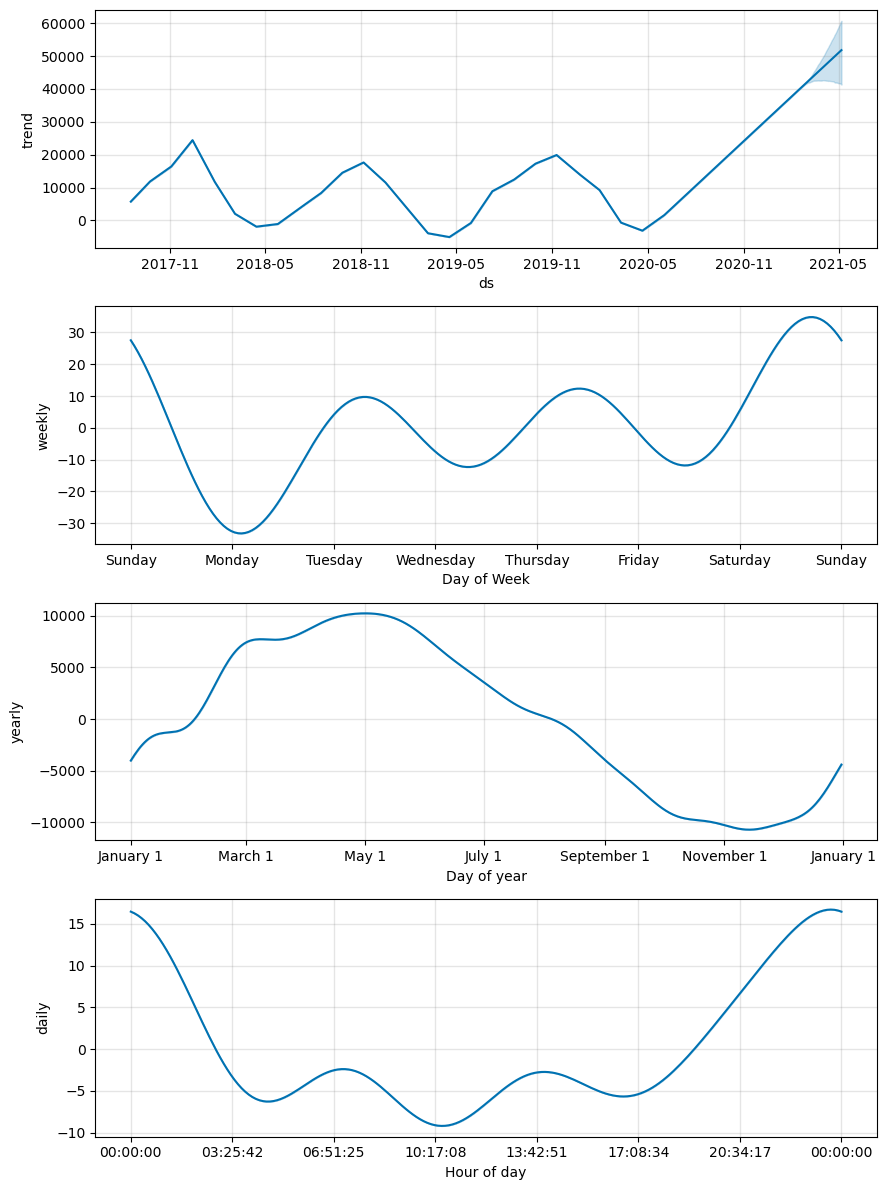

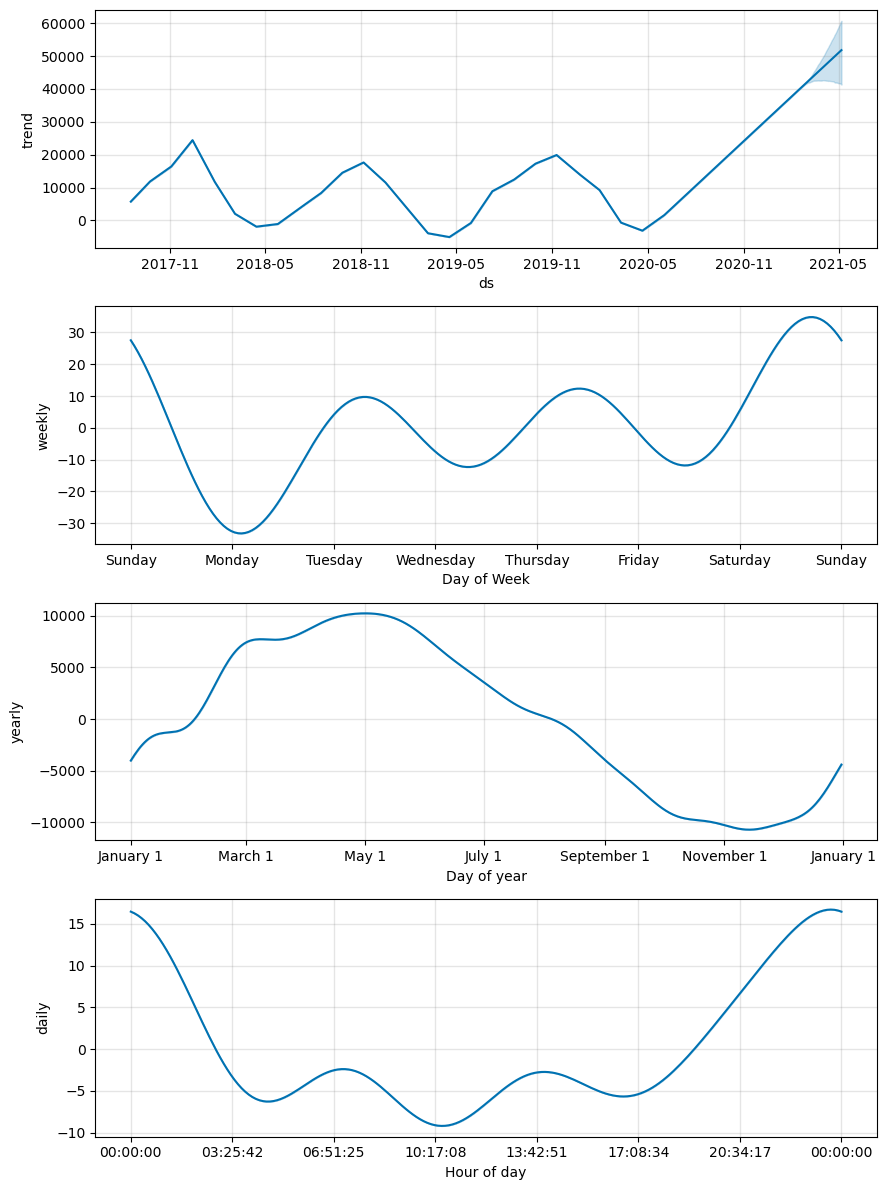

In [358]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model.plot_components(forecast_mercado_trends)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
Midnight

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
Saturday heading into Sunday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
November to December timeframe


In [359]:
# print my python version, and print all my library versions
import sys
print(sys.version)

# print the versions of the libraries that I used in this project
import pandas as pd
import requests
import json
print(f"pandas version: {pd.__version__}")
print(f"requests version: {requests.__version__}")
print(f"json version: {json.__version__}")

# print all versions of packages and libraries I used in this project
import os
os.system("pip freeze")
# output to a file
os.system("pip freeze > requirements.txt")
# print the contents of the file
os.system("cat requirements.txt")

3.10.14 (main, May  6 2024, 14:42:37) [Clang 14.0.6 ]
pandas version: 2.2.2
requests version: 2.32.3
json version: 2.0.9
aiobotocore @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_1cl06d5vjc/croot/aiobotocore_1714464399334/work
aiohttp @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_1bydo4860s/croot/aiohttp_1715108783113/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_39uesgct45/croot/alabaster_1718201495024/work
altair @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_a8x4081_4h/croot/altair_1687526044471/work
anyio @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a17a7759g2/croot/anyio_1706220182417/work
appdirs==1.4.4
applaunchservices @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_1fiu9w6r9i/croots/

0


blinker @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d64vvpf_j3/croot/blinker_1696539070114/work
bokeh @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_a23glgv3ft/croot/bokeh_1718119064378/work
botocore @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_733ekid_nr/croot/botocore_1714460542833/work
Bottleneck @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_2bxpizxa3c/croot/bottleneck_1707864819812/work
Brotli @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_27zk0eqdh0/croot/brotli-split_1714483157007/work
cachetools @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_6a4ekiifd5/croot/cachetools_1713977095290/work
census==0.8.22
certifi @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_22gybxx1lv/croot/certifi_1717618066699/work/certifi
cffi @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7a9c7wyorr/croot/cffi_17144831577

43xm9fv/croot/pytoolconfig_1701728714940/work
pytz @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a4b76c83ik/croot/pytz_1713974318928/work
pyviz_comms @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_c98m0kf4qk/croot/pyviz_comms_1711136840525/work
pywavelets @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_ab3sn2fmxp/croot/pywavelets_1705049822227/work
PyYAML @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_a8_sdgulmz/croot/pyyaml_1698096054705/work
pyzmq @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_43pxpbos3z/croot/pyzmq_1705605108344/work
QDarkStyle @ file:///croot/qdarkstyle_1709231003551/work
qstylizer @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_89jt0xlnxz/croot/qstylizer_1674008531745/work/dist/qstylizer-0.2.2-py2.py3-none-any.whl
QtAwesome @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_204g337__t/croot/qtawesome_1674008697